In [55]:
import pandas as pd #type: ignore
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore
import seaborn as sns #type: ignore
import os
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_json('../TransfromedData/transformed_products_units.json')

In [3]:
df.head()

,2023-04-02,2023-04-03,2023-04-04,2023-04-05,2023-04-06,2023-04-07,2023-04-08,2023-04-09,2023-04-10,2023-04-11,2023-04-12,2023-04-13,2023-04-14,2023-04-15,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-04-29,2023-04-30,2023-05-01,2023-05-02,2023-05-03,2023-05-04,2023-05-05,2023-05-06,2023-05-07,2023-05-08,2023-05-09,2023-05-10,2023-05-11,2023-05-12,2023-05-13,2023-05-14,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-20,2023-05-21,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-27,2023-05-28,2023-05-29,2023-05-30,2023-05-31,2023-06-01,2023-06-02,2023-06-03,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,2023-06-11,2023-06-12,2023-06-13,2023-06-14,2023-06-15,2023-06-16,2023-06-17,2023-06-18,2023-06-19,2023-06-20,2023-06-21,2023-06-22,2023-06-23,2023-06-24,2023-06-25,2023-06-26,2023-06-27,2023-06-28,2023-06-29,2023-06-30,2023-07-01,2023-07-02,2023-07-03,2023-07-04,2023-07-05,2023-07-06,2023-07-07,2023-07-08,2023-07-09,2023-07-10,2023-07-11,2023-07-12,2023-07-13,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23,2023-07-24,2023-07-25,2023-07-26,2023-07-27,2023-07-28,2023-07-29,2023-07-30,2023-07-31,2023-08-01,2023-08-02,2023-08-03,2023-08-04,2023-08-05,2023-08-06,2023-08-07,2023-08-08,2023-08-09,2023-08-10,2023-08-11,2023-08-12,2023-08-13,2023-08-14,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-19,2023-08-20,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-26,2023-08-27,2023-08-28,2023-08-29,2023-08-30,2023-08-31,2023-09-01,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,2023-09-11,2023-09-12,2023-09-13,2023-09-14,2023-09-15,2023-09-16,2023-09-17,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-23,2023-09-24,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29,2023-09-30,2023-10-01,2023-10-02,2023-10-03,2023-10-04,2023-10-05,2023-10-06,2023-10-07,2023-10-08,2023-10-09,2023-10-10,2023-10-11,2023-10-12,2023-10-13,2023-10-14,2023-10-15,2023-10-16,2023-10-17,2023-10-18,2023-10-19,2023-10-20,2023-10-21,2023-10-22,2023-10-23,2023-10-24,2023-10-25,2023-10-26,2023-10-27,2023-10-28,2023-10-29,2023-10-30,2023-10-31,2023-11-01,2023-11-02,2023-11-03,2023-11-04,2023-11-05,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-11,2023-11-12,2023-11-13,2023-11-14,2023-11-15,2023-11-16,2023-11-17,2023-11-18,2023-11-19,2023-11-20,2023-11-21,2023-11-22,2023-11-23,2023-11-24,2023-11-25,2023-11-26,2023-11-27,2023-11-28,2023-11-29,2023-11-30,2023-12-01,2023-12-02,2023-12-03,2023-12-04,2023-12-05,2023-12-06,2023-12-07,2023-12-08,2023-12-09,2023-12-10,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15,2023-12-16,2023-12-17,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30,2023-12-31,2024-01-01,2024-01-02,2024-01-03,2024-01-04,2024-01-05,2024-01-06,2024-01-07,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-13,2024-01-14,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-20,2024-01-21,2024-01-22,2024-01-23,2024-01-24,2024-01-25,2024-01-26,2024-01-27,2024-01-28,2024-01-29,2024-01-30,2024-01-31,2024-02-01,2024-02-02,2024-02-03,2024-02-04,2024-02-05,2024-02-06,2024-02-07,2024-02-08,2024-02-09,2024-02-10,2024-02-11,2024-02-12,2024-02-13,2024-02-14,2024-02-15,2024-02-16,2024-02-17,2024-02-18,2024-02-19,2024-02-20,2024-02-21,2024-02-22,2024-02-23,2024-02-24,2024-02-25,2024-02-26,2024-02-27,2024-02-28,2024-02-29,2024-03-01,2024-03-02,2024-03-03,2024-03-04,2024-03-05,2024-03-06,2024-03-07,2024-03-08,2024-03-09,2024-03-10,2024-03-11,2024-03-12,2024-03-13,2024-03-14,2024-03-15,2024-03-16,2024-03-17,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22,2024-03-23,2024-03-24,2024-03-25,2024-03-26,2024-03-27,2024-03-28,2024-03-29,2024-0

### **Load and transform the data from a json to csv**

In [56]:
def load_and_transform_data(file_path):

    with open(file_path, 'r') as f:
        data = json.load(f)
    
    records = []

    for date, values in data.items():
        record = {
            'date': date,
            'unit': values.get('unit'),
            'code': values.get('code'),
            'product': values.get('product'),
            'public': values.get('public'),
            'price': values.get('price'),
            'board': values.get('board'),
            'rateBasis': values.get('rateBasis'),
            'currency': values.get('currency'),
            'ratePlanCode': values.get('ratePlanCode'),
            'beds': values.get('beds'),
            'createdOn': values.get('createdOn'),
            'name': values.get('name'),
            'type': values.get('type'),
            'property': values.get('property'),
            'count': values.get('count'),
            'area': values.get('area'),
        }

        if 'supplement' in values:
            supplement = values['supplement']
            if supplement:
                for key, value in supplement.items():
                    record[f'supplement_{key}'] = value
        
        if 'occupancy' in values:
            occupancy = values['occupancy']
            if occupancy:
                for category in ['adults', 'infants', 'children']:
                    if category in occupancy:
                        for key, value in occupancy[category].items():
                            record[f'occupancy_{category}_{key}'] = value

        records.append(record)

    df = pd.DataFrame(records)
    return df

In [58]:
df_166 = load_and_transform_data('../TransfromedData/transformed_products_units_166.json')
df_167 = load_and_transform_data('../TransfromedData/transformed_products_units_167.json')
df_187 = load_and_transform_data('../TransfromedData/transformed_products_units_187.json')

In [54]:
df_166.head()

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label,supplement_2,supplement_4,supplement_12
0,2023-04-02,166,1354,1354,1782.00,1782.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
1,2023-04-03,166,1354,1354,1782.00,1782.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
2,2023-04-04,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
3,2023-04-05,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
4,2023-04-06,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN


In [59]:
df_167.head()

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,supplement_2,supplement_4,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label
0,2023-04-04,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
1,2023-04-05,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
2,2023-04-06,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
3,2023-04-07,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
4,2023-04-08,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants


In [61]:
df_187.head()

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label
0,2024-11-01,187,4114,4114,109.35,109.35,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,3,1,Adultes,2,0,Bébé,2,0,Enfants
1,2024-11-02,187,4114,4114,109.35,109.35,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,3,1,Adultes,2,0,Bébé,2,0,Enfants
2,2024-11-03,187,4114,4114,109.35,109.35,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,3,1,Adultes,2,0,Bébé,2,0,Enfants
3,2024-11-04,187,4114,4114,109.35,109.35,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,3,1,Adultes,2,0,Bébé,2,0,Enfants
4,2024-11-05,187,4114,4114,109.35,109.35,1222,132,None,None,None,2025-01-06T15:26:36.353457,promo,1,147,10,30,3,1,Adultes,2,0,Bébé,2,0,Enfants


In [62]:
df = pd.concat([df_166, df_167, df_187])
df.head()

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label,supplement_2,supplement_4,supplement_12
0,2023-04-02,166,1354,1354,1782.00,1782.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
1,2023-04-03,166,1354,1354,1782.00,1782.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
2,2023-04-04,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
3,2023-04-05,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN
4,2023-04-06,166,1354,1354,1782.00,1890.00,1222,68,None,None,None,2023-03-15T10:46:13.232716,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,NaN,NaN,NaN


In [65]:
df.to_csv('../CleanData/All_products_units.csv', index=False)

In [5]:
df = load_and_transform_data('../TransfromedData/transformed_products_units.json')
df.head()

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,supplement_2,supplement_4,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label
0,2023-04-02,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
1,2023-04-03,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
2,2023-04-04,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
3,2023-04-05,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants
4,2023-04-06,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,0.0,0.0,4,2,Adultes,0,0,Bébé,3,0,Enfants


In [64]:
df.columns

Index(['date', 'unit', 'code', 'product', 'public', 'price', 'board',
       'rateBasis', 'currency', 'ratePlanCode', 'beds', 'createdOn', 'name',
       'type', 'property', 'count', 'area', 'occupancy_adults_max',
       'occupancy_adults_min', 'occupancy_adults_label',
       'occupancy_infants_max', 'occupancy_infants_min',
       'occupancy_infants_label', 'occupancy_children_max',
       'occupancy_children_min', 'occupancy_children_label', 'supplement_2',
       'supplement_4', 'supplement_12'],
      dtype='object')

In [9]:
df.to_csv('../CleanData/cleaned_products_units.csv', index=False)

In [66]:
df.shape

(2164, 29)

### **Handling the missing data and also the set the types**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 0 to 180
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      2164 non-null   object 
 1   unit                      2164 non-null   int64  
 2   code                      2164 non-null   int64  
 3   product                   2164 non-null   int64  
 4   public                    1804 non-null   object 
 5   price                     1919 non-null   object 
 6   board                     2164 non-null   int64  
 7   rateBasis                 2164 non-null   int64  
 8   currency                  0 non-null      object 
 9   ratePlanCode              38 non-null     object 
 10  beds                      0 non-null      object 
 11  createdOn                 2164 non-null   object 
 12  name                      2164 non-null   object 
 13  type                      2164 non-null   int64  
 14  property      

In [68]:
df.isnull().sum()

date                           0
unit                           0
code                           0
product                        0
public                       360
price                        245
board                          0
rateBasis                      0
currency                    2164
ratePlanCode                2126
beds                        2164
createdOn                      0
name                           0
type                           0
property                       0
count                          0
area                           0
occupancy_adults_max           0
occupancy_adults_min           0
occupancy_adults_label         0
occupancy_infants_max          0
occupancy_infants_min          0
occupancy_infants_label        0
occupancy_children_max         0
occupancy_children_min         0
occupancy_children_label       0
supplement_2                 502
supplement_4                 502
supplement_12               2111
dtype: int64

In [69]:
df.isna().sum()

date                           0
unit                           0
code                           0
product                        0
public                       360
price                        245
board                          0
rateBasis                      0
currency                    2164
ratePlanCode                2126
beds                        2164
createdOn                      0
name                           0
type                           0
property                       0
count                          0
area                           0
occupancy_adults_max           0
occupancy_adults_min           0
occupancy_adults_label         0
occupancy_infants_max          0
occupancy_infants_min          0
occupancy_infants_label        0
occupancy_children_max         0
occupancy_children_min         0
occupancy_children_label       0
supplement_2                 502
supplement_4                 502
supplement_12               2111
dtype: int64

In [70]:
df.sample(10)

,date,unit,code,product,public,price,board,rateBasis,currency,ratePlanCode,beds,createdOn,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_adults_label,occupancy_infants_max,occupancy_infants_min,occupancy_infants_label,occupancy_children_max,occupancy_children_min,occupancy_children_label,supplement_2,supplement_4,supplement_12
230,2023-11-20,167,1370,1370,None,None,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
831,2024-11-14,167,3710,3710,2244.00,2244.00,1222,240,None,None,None,2024-11-11T09:27:41.24212,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,NaN,NaN,NaN
663,2025-05-30,167,4246,4246,2361.00,2361.00,1222,262,None,None,None,2025-03-03T10:13:20.142037,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
428,2024-06-03,167,1857,1857,2640.00,2640.00,1222,175,None,None,None,2024-04-29T16:10:29.116465,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
303,2024-02-01,167,1370,1370,None,None,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
78,2023-06-21,167,1370,1370,2856.00,2652.00,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
941,2024-10-29,167,3005,3005,2462.00,2462.00,1222,214,None,None,None,2024-08-15T11:32:25.45789,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
200,2023-10-21,167,1373,1373,1905.00,2275.00,1222,68,None,None,None,2023-03-15T10:57:29.366271,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
11,2023-04-15,167,1370,1370,2284.50,2284.50,1222,68,None,None,None,2023-03-15T10:57:29.365233,Family Room,1,147,100,45,4,2,Adultes,0,0,Bébé,3,0,Enfants,0.0,0.0,NaN
441,2024-06-16,166,2474,2474,399.00,399.00,1222,196,None,398660:NR:HR:391001,None,2024-06-13T10:57:50.176272,Standard Room,1,147,150,32,3,1,Adultes,2,0,Bébé,2,0,Enfants,0.0,0.0,NaN


In [71]:
columns_to_drop = ['board', 'createdOn', 'occupancy_infants_label', 'occupancy_adults_label', 'occupancy_children_label', 'ratePlanCode', 'beds', 'currency', 'supplement_2', 'supplement_4', 'supplement_12']

df.drop(columns=columns_to_drop, inplace=True)

In [72]:
df.sample(10)

,date,unit,code,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min
283,2024-01-12,167,1370,1370,None,None,68,Family Room,1,147,100,45,4,2,0,0,3,0
532,2025-01-19,167,4063,4063,2003.00,2003.00,255,Family Room,1,147,100,45,4,2,0,0,3,0
262,2023-12-20,166,1354,1354,1755.00,1620.00,68,Standard Room,1,147,150,32,3,1,2,0,2,0
144,2025-03-25,187,4114,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0
487,2024-08-01,167,2532,2532,3208.00,3208.00,201,Family Room,1,147,100,45,4,2,0,0,3,0
33,2023-05-05,166,1352,1352,2700.00,2430.00,68,Standard Room,1,147,150,32,3,1,2,0,2,0
767,2025-05-08,166,4241,4241,1911.25,1911.25,262,Standard Room,1,147,150,32,3,1,2,0,2,0
677,2025-02-07,166,4224,4224,133.95,133.95,260,Standard Room,1,147,150,32,3,1,2,0,2,0
514,2024-08-28,166,3003,3003,2006.00,2006.00,214,Standard Room,1,147,150,32,3,1,2,0,2,0
133,2025-03-14,187,4114,4114,109.35,109.35,132,promo,1,147,10,30,3,1,2,0,2,0


In [73]:
df.isna().sum()

date                        0
unit                        0
code                        0
product                     0
public                    360
price                     245
rateBasis                   0
name                        0
type                        0
property                    0
count                       0
area                        0
occupancy_adults_max        0
occupancy_adults_min        0
occupancy_infants_max       0
occupancy_infants_min       0
occupancy_children_max      0
occupancy_children_min      0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 0 to 180
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2164 non-null   object
 1   unit                    2164 non-null   int64 
 2   code                    2164 non-null   int64 
 3   product                 2164 non-null   int64 
 4   public                  1804 non-null   object
 5   price                   1919 non-null   object
 6   rateBasis               2164 non-null   int64 
 7   name                    2164 non-null   object
 8   type                    2164 non-null   int64 
 9   property                2164 non-null   int64 
 10  count                   2164 non-null   int64 
 11  area                    2164 non-null   int64 
 12  occupancy_adults_max    2164 non-null   int64 
 13  occupancy_adults_min    2164 non-null   int64 
 14  occupancy_infants_max   2164 non-null   int64 
 15  occupancy_

In [75]:
df['price'] = df['price'].astype(float)
df['public'] = df['public'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 0 to 180
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2164 non-null   datetime64[ns]
 1   unit                    2164 non-null   int64         
 2   code                    2164 non-null   int64         
 3   product                 2164 non-null   int64         
 4   public                  1804 non-null   float64       
 5   price                   1919 non-null   float64       
 6   rateBasis               2164 non-null   int64         
 7   name                    2164 non-null   object        
 8   type                    2164 non-null   int64         
 9   property                2164 non-null   int64         
 10  count                   2164 non-null   int64         
 11  area                    2164 non-null   int64         
 12  occupancy_adults_max    2164 non-null   int64         

In [77]:
df['price'] = df['price'].fillna(df['price'].mean())
df['public'] = df['public'].fillna(df['public'].mean())
df.sample(10)

,date,unit,code,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min
874,2024-08-23,167,3005,3005,2462.000000,2462.000000,214,Family Room,1,147,100,45,4,2,0,0,3,0
945,2025-11-02,166,3703,3703,2405.700000,2405.700000,240,Standard Room,1,147,150,32,3,1,2,0,2,0
183,2023-10-02,166,1352,1352,1689.937511,1719.748968,68,Standard Room,1,147,150,32,3,1,2,0,2,0
101,2025-02-10,187,4114,4114,109.350000,109.350000,132,promo,1,147,10,30,3,1,2,0,2,0
635,2024-12-27,166,4224,4224,133.950000,133.950000,260,Standard Room,1,147,150,32,3,1,2,0,2,0
414,2024-05-20,167,1906,1906,140.000000,140.000000,181,Family Room,1,147,100,45,4,2,0,0,3,0
511,2024-12-29,167,3710,3710,3367.000000,4810.000000,240,Family Room,1,147,100,45,4,2,0,0,3,0
31,2023-05-05,167,1370,1370,3300.000000,3300.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0
417,2024-05-23,166,2354,2354,185.250000,185.250000,189,Standard Room,1,147,150,32,3,1,2,0,2,0
327,2024-02-23,166,1512,1512,158.400000,158.400000,88,Standard Room,1,147,150,32,3,1,2,0,2,0


In [78]:
df.isnull().sum()

date                      0
unit                      0
code                      0
product                   0
public                    0
price                     0
rateBasis                 0
name                      0
type                      0
property                  0
count                     0
area                      0
occupancy_adults_max      0
occupancy_adults_min      0
occupancy_infants_max     0
occupancy_infants_min     0
occupancy_children_max    0
occupancy_children_min    0
dtype: int64

In [79]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df.sample(10)

,date,unit,code,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min,year,month,day,day_of_week
440,2024-06-15,167,2478,2478,629.000000,629.000000,196,Family Room,1,147,100,45,4,2,0,0,3,0,2024,6,15,5
532,2025-01-19,167,4063,4063,2003.000000,2003.000000,255,Family Room,1,147,100,45,4,2,0,0,3,0,2025,1,19,6
186,2023-10-05,166,1352,1352,1689.937511,1719.748968,68,Standard Room,1,147,150,32,3,1,2,0,2,0,2023,10,5,3
120,2023-07-31,166,1352,1352,2700.000000,2700.000000,68,Standard Room,1,147,150,32,3,1,2,0,2,0,2023,7,31,0
453,2024-06-28,167,2478,2478,629.000000,629.000000,196,Family Room,1,147,100,45,4,2,0,0,3,0,2024,6,28,4
704,2025-03-06,166,4241,4241,1660.000000,1660.000000,262,Standard Room,1,147,150,32,3,1,2,0,2,0,2025,3,6,3
686,2025-06-22,167,4246,4246,2361.000000,2361.000000,262,Family Room,1,147,100,45,4,2,0,0,3,0,2025,6,22,6
505,2024-12-23,167,3710,3710,2960.000000,3515.000000,240,Family Room,1,147,100,45,4,2,0,0,3,0,2024,12,23,0
965,2025-11-22,166,3703,3703,1852.200000,1852.200000,240,Standard Room,1,147,150,32,3,1,2,0,2,0,2025,11,22,5
124,2023-08-06,167,1373,1373,2580.000000,3000.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,8,6,6


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 0 to 180
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2164 non-null   datetime64[ns]
 1   unit                    2164 non-null   int64         
 2   code                    2164 non-null   int64         
 3   product                 2164 non-null   int64         
 4   public                  2164 non-null   float64       
 5   price                   2164 non-null   float64       
 6   rateBasis               2164 non-null   int64         
 7   name                    2164 non-null   object        
 8   type                    2164 non-null   int64         
 9   property                2164 non-null   int64         
 10  count                   2164 non-null   int64         
 11  area                    2164 non-null   int64         
 12  occupancy_adults_max    2164 non-null   int64         

In [81]:
df.to_csv('../CleanData/cleaned_products_data_all.csv', index=False)

In [89]:
df['unit'].unique()

array([166, 167, 187], dtype=int64)

In [90]:
df['unit'].value_counts()

unit
167    994
166    989
187    181
Name: count, dtype: int64

### **Let's do some EDA**

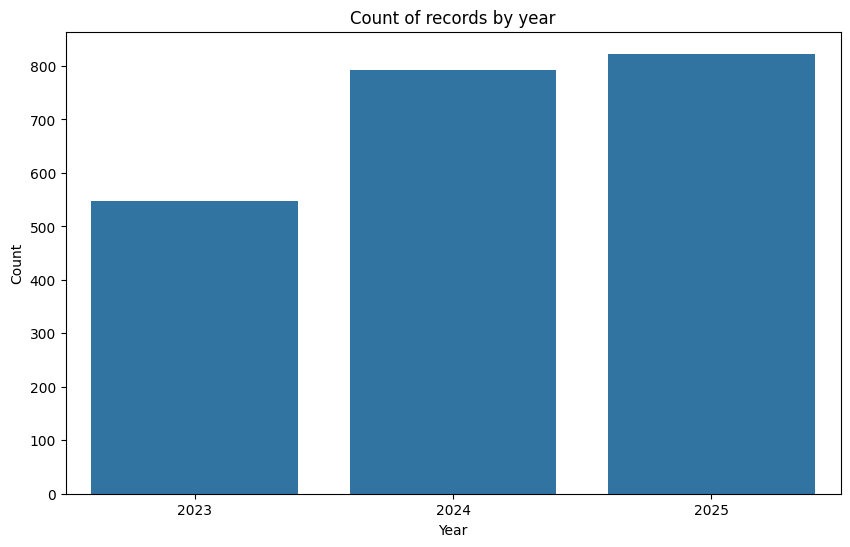

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Count of records by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

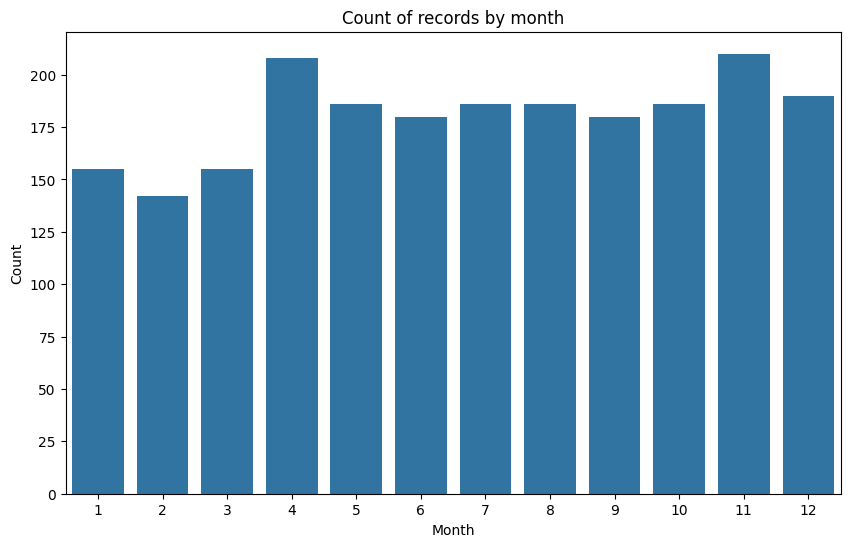

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df)
plt.title('Count of records by month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

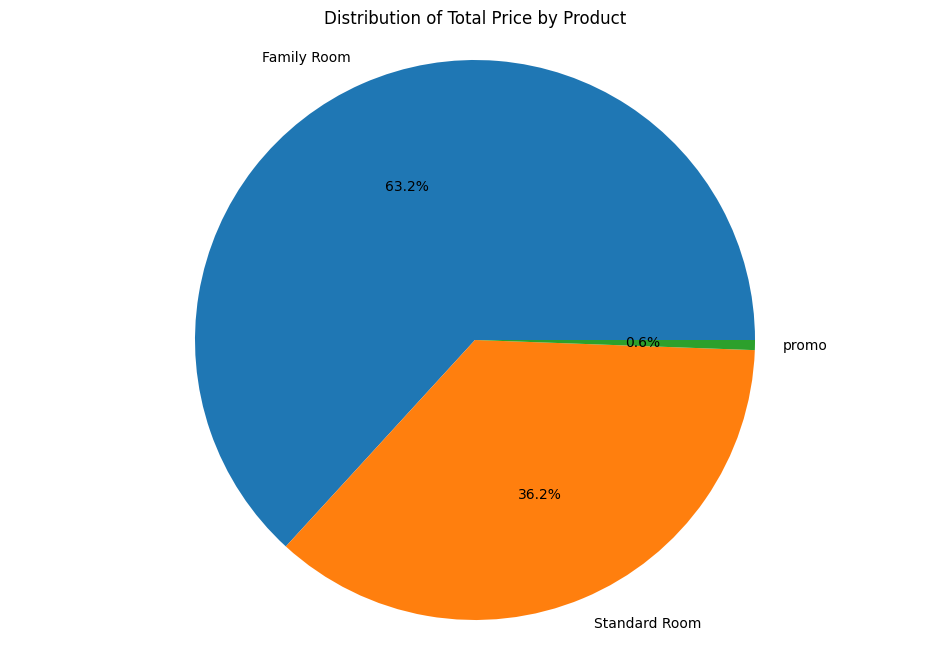

In [93]:
data = df.groupby('name')['price'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.pie(data['price'], labels=data['name'], autopct='%1.1f%%')
plt.title('Distribution of Total Price by Product')
plt.axis('equal')  
plt.show()


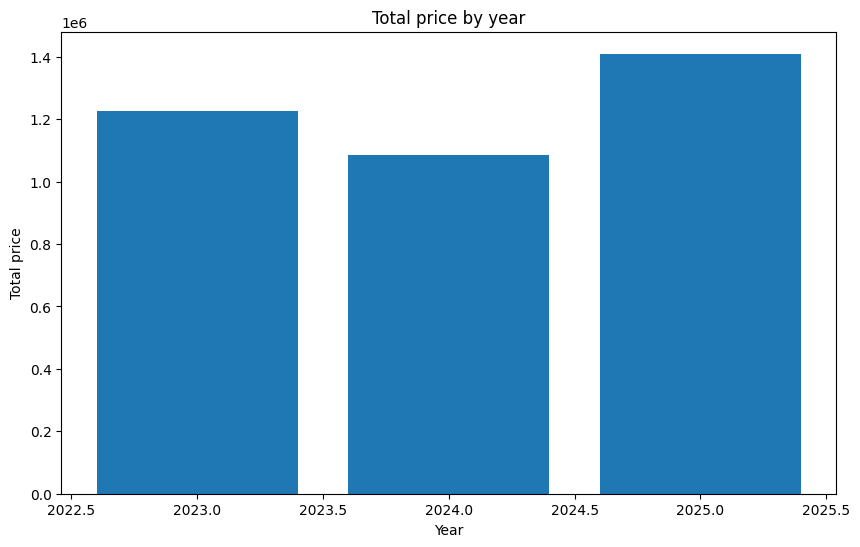

In [94]:
data = df.groupby('year')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(data['year'], data['price'])
plt.title('Total price by year')
plt.xlabel('Year')
plt.ylabel('Total price')
plt.show()

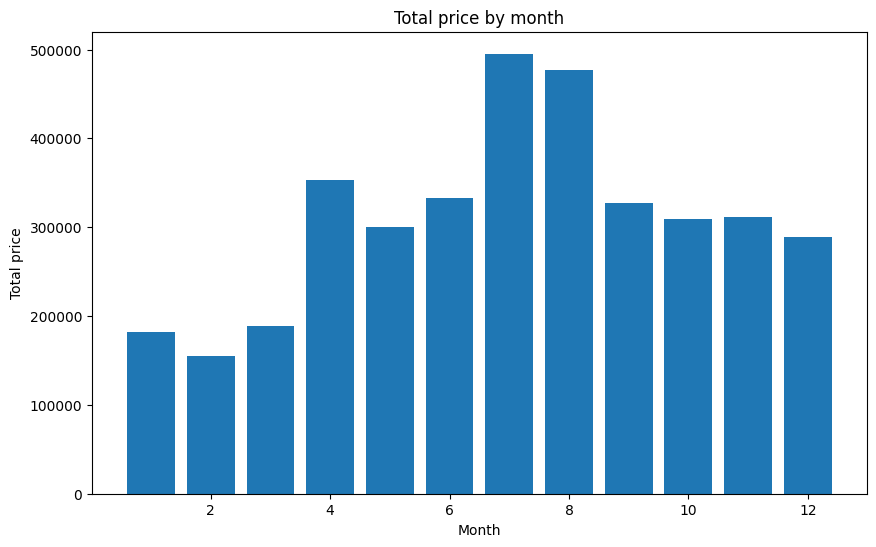

In [95]:
data = df.groupby('month')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(data['month'], data['price'])
plt.title('Total price by month')
plt.xlabel('Month')
plt.ylabel('Total price')
plt.show()

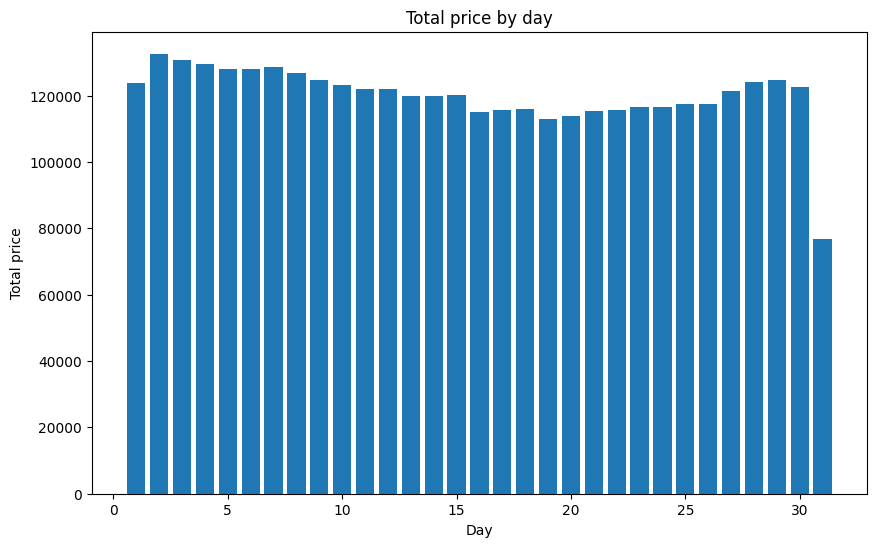

In [96]:
data = df.groupby('day')['price'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(data['day'], data['price'])
plt.title('Total price by day')
plt.xlabel('Day')
plt.ylabel('Total price')
plt.show()

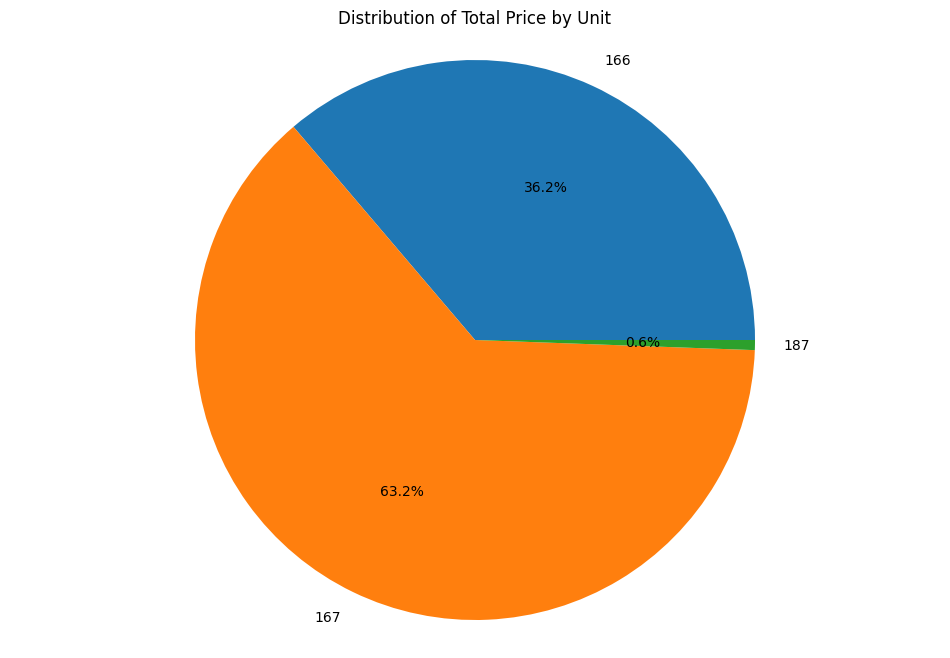

In [97]:
data = df.groupby('unit')['price'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.pie(data['price'], labels=data['unit'], autopct='%1.1f%%')
plt.title('Distribution of Total Price by Unit')
plt.axis('equal')
plt.show()

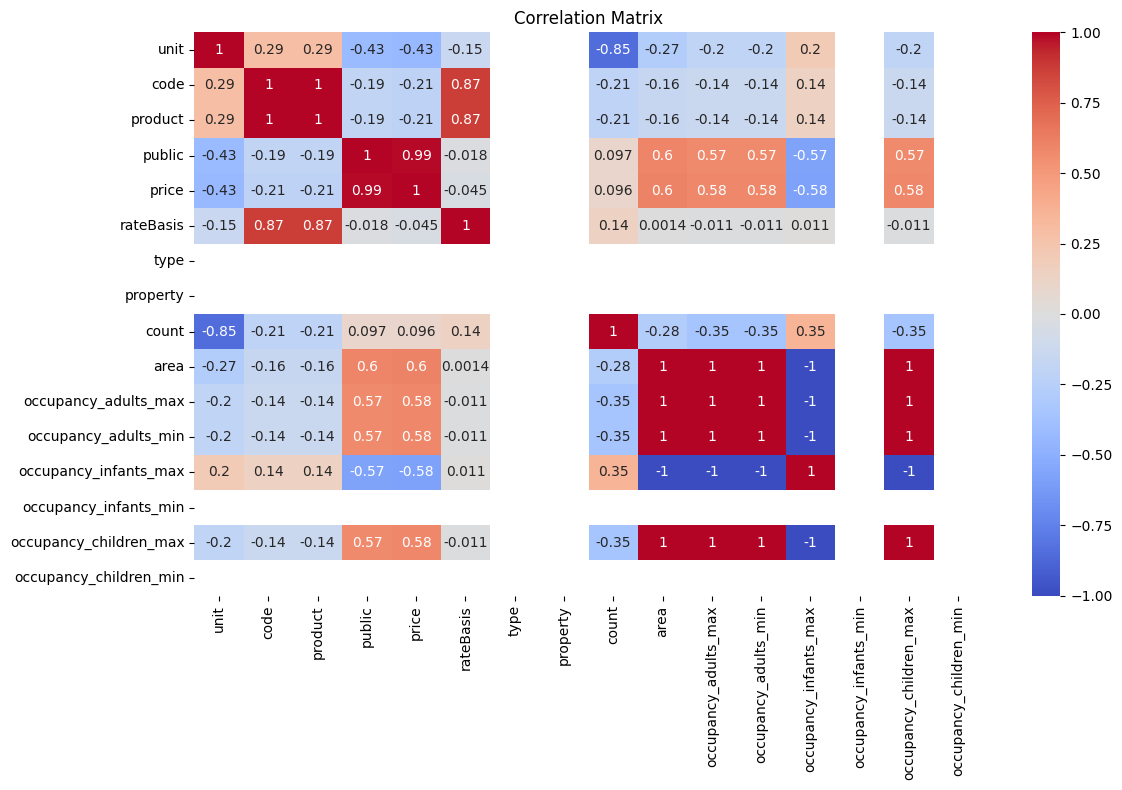

In [102]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

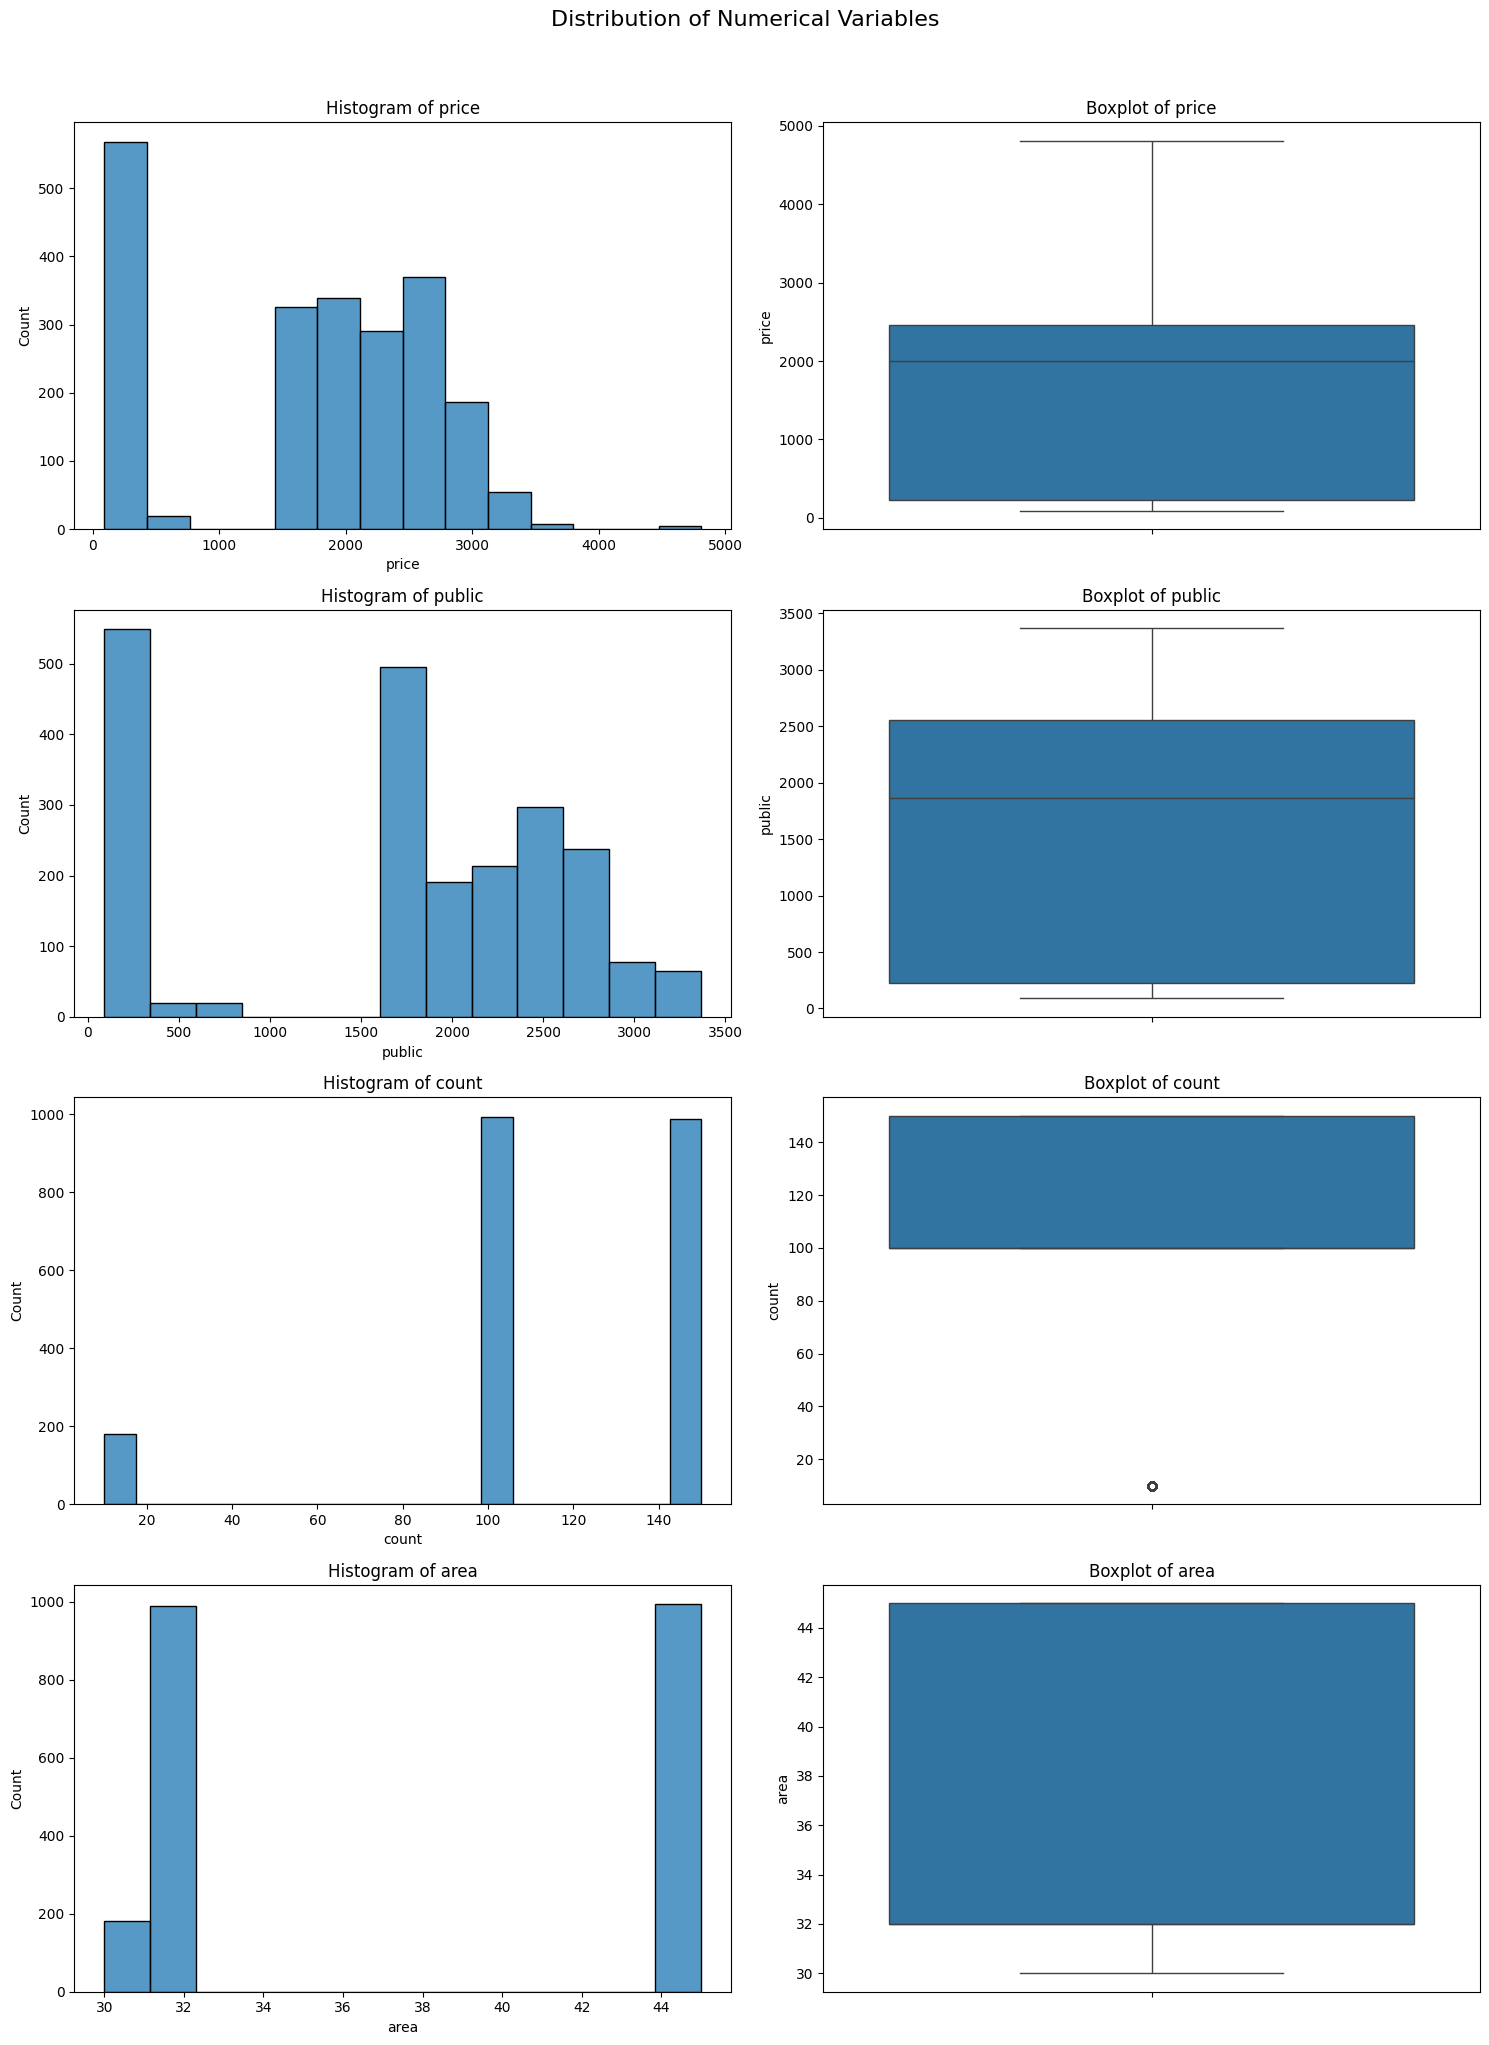

In [ ]:
numerical_cols = ['price', 'public', 'count', 'area']
n_cols = len(numerical_cols)
fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
fig.suptitle('Distribution of Numerical Variables', y=1.02, size=16)

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')
    
    sns.boxplot(data=df, y=col, ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

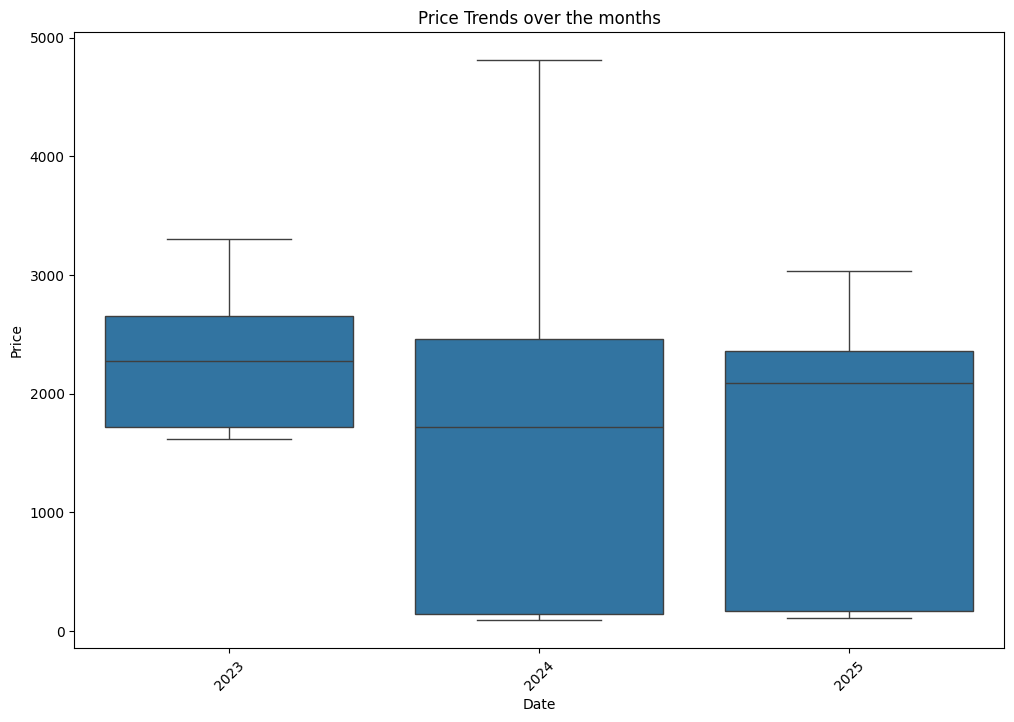

In [112]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='price', data=df)
plt.title('Price Trends over the months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [99]:
df.columns

Index(['date', 'unit', 'code', 'product', 'public', 'price', 'rateBasis',
       'name', 'type', 'property', 'count', 'area', 'occupancy_adults_max',
       'occupancy_adults_min', 'occupancy_infants_max',
       'occupancy_infants_min', 'occupancy_children_max',
       'occupancy_children_min', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [98]:
df['unit'].unique()

array([166, 167, 187], dtype=int64)

In [113]:
df.sample(10)

,date,unit,code,product,public,price,rateBasis,name,type,property,count,area,occupancy_adults_max,occupancy_adults_min,occupancy_infants_max,occupancy_infants_min,occupancy_children_max,occupancy_children_min,year,month,day,day_of_week
879,2025-08-28,166,4241,4241,2337.000000,2337.000000,262,Standard Room,1,147,150,32,3,1,2,0,2,0,2025,8,28,3
103,2025-02-12,187,4114,4114,109.350000,109.350000,132,promo,1,147,10,30,3,1,2,0,2,0,2025,2,12,2
531,2025-01-18,167,4063,4063,2003.000000,2003.000000,255,Family Room,1,147,100,45,4,2,0,0,3,0,2025,1,18,5
123,2023-08-05,167,1373,1373,2580.000000,3000.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,8,5,5
859,2025-08-08,166,4241,4241,2337.000000,2337.000000,262,Standard Room,1,147,150,32,3,1,2,0,2,0,2025,8,8,4
268,2023-12-28,167,1373,1373,2560.000000,2344.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,12,28,3
516,2024-08-30,166,3003,3003,2006.000000,2006.000000,214,Standard Room,1,147,150,32,3,1,2,0,2,0,2024,8,30,4
48,2023-05-22,167,1370,1370,2830.000000,2465.000000,68,Family Room,1,147,100,45,4,2,0,0,3,0,2023,5,22,0
927,2024-10-15,167,3005,3005,2608.000000,2608.000000,214,Family Room,1,147,100,45,4,2,0,0,3,0,2024,10,15,1
277,2024-01-06,167,1370,1370,1689.937511,1719.748968,68,Family Room,1,147,100,45,4,2,0,0,3,0,2024,1,6,5
